In [41]:
import pandas as pd
import numpy as np
import re
import src.operaciones as op
import matplotlib.pyplot as plot

In [42]:
data = pd.read_csv('input/attacks.csv', encoding = 'latin1')

## Printeamos el DataFrame para la visualización y plantear la hipotesis. 

In [43]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### Miramos las columnas que tenemos en el DF
### Miramos el tamaño y el shape de el DF. 

In [44]:
data.columns
print(data.shape)
print (data.size)

(25723, 24)
617352


### Vemos a ver cuantos estan con objetos Nulos
### Los que tenemos con Nulos los limpiaremos en un futuro

In [45]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

#### Una vez visto por encima el DataFrame, empezamos a limpiarlo poco a poco para tener una tabla limpia 
#### y luego poder sacar varias hipotesis. 

# Data Cleaning!! 

### Lo primero que hemos visto es que tanto en la columna Species como Sex, las dos tienen un espacio al final. 
#### Para curarnos en salud, vamos a eliminar ese espacio del nombre. 

In [46]:
data.rename(columns={'Species ':'Species',
                        'Sex ':'Sex'},
               inplace=True)
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

### Borramos todos los duplicados del DF. 

In [47]:
data_clean = data.drop_duplicates()


 ### Revisamos si se ha hecho bien la limpieza.

In [48]:
print(data_clean.size)
print(data_clean.shape)
data_clean.info()

151488
(6312, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6310 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species              

### Vamos a ver que hay en las columnas "Unnamed: 22" y 'Unnamed: 23'

In [49]:
data["Unnamed: 22"].isnull().value_counts() # Falso =. Verdadero = 
display(data[data["Unnamed: 22"].notnull()])
# A no ser relevante en los datos que no son nulos, procederemos a borrar esa columna de datos. 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,...,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN


In [50]:
#Hacemos lo mismo con la columna 
data["Unnamed: 23"].isnull().value_counts()
display(data[data["Unnamed: 23"].notnull()])
# A no ser relevante en los datos que no son nulos, procederemos a borrar esa columna de datos. 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,...,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,...,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


In [51]:
# Borramos la columna ["Unnamed: 22"] y ["Unnamed: 23"]
data_clean = data.drop(['Unnamed: 23' , 'Unnamed: 22'] , axis = 1)
display(data_clean.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


### Creamos el DF que podamos necesitar para demostrar diferentes hipotesis.

In [52]:
 #Dejamos algunas columnas de mas que pueden ser interesantes para llegar a otra hipotesis en el futuro. 
data_clean = data_clean[['Case Number', 'Date', 'Year', 'Type', 'Country','Activity', 'Sex', 'Fatal (Y/N)', 'Species', 'Investigator or Source', 'pdf', 'Injury']]
display(data_clean.head())

,Case Number,Date,Year,Type,Country,Activity,Sex,Fatal (Y/N),Species,Investigator or Source,pdf,Injury
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,F,N,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,"No injury to occupant, outrigger canoe and pad..."
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,F,N,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,Minor injury to left thigh
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,M,N,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,Injury to left lower leg from surfboard skeg
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,M,N,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,Minor injury to lower leg
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,M,N,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,Lacerations to leg & hand shark PROVOKED INCIDENT


In [53]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Activity                5758 non-null   object 
 6   Sex                     5737 non-null   object 
 7   Fatal (Y/N)             5763 non-null   object 
 8   Species                 3464 non-null   object 
 9   Investigator or Source  6285 non-null   object 
 10  pdf                     6302 non-null   object 
 11  Injury                  6274 non-null   object 
dtypes: float64(1), object(11)
memory usage: 2.4+ MB


### Con esto quitamos las filas que tengan mas del 50% de NaN ya que no podremos hacer nada con ellas y no es significativo

In [55]:
data_clean = data_clean.dropna(thresh=(data_clean.shape[1] - 6))

In [56]:
#Revisamos si se ha hecho bien la limpieza.
print(data_clean.size)
print(data_clean.shape)
data_clean.info()

75624
(6302, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Activity                5758 non-null   object 
 6   Sex                     5737 non-null   object 
 7   Fatal (Y/N)             5763 non-null   object 
 8   Species                 3464 non-null   object 
 9   Investigator or Source  6285 non-null   object 
 10  pdf                     6302 non-null   object 
 11  Injury                  6274 non-null   object 
dtypes: float64(1), object(11)
memory usage: 640.0+ KB


In [57]:
#Para saber cuantos nulos tenemos en cada una de nuestras columnas
data_clean.isnull().sum()

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Activity                   544
Sex                        565
Fatal (Y/N)                539
Species                   2838
Investigator or Source      17
pdf                          0
Injury                      28
dtype: int64

## Empezamos con la limpieza de diferentes columnas


In [58]:
data_clean.info()
data_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Activity                5758 non-null   object 
 6   Sex                     5737 non-null   object 
 7   Fatal (Y/N)             5763 non-null   object 
 8   Species                 3464 non-null   object 
 9   Investigator or Source  6285 non-null   object 
 10  pdf                     6302 non-null   object 
 11  Injury                  6274 non-null   object 
dtypes: float64(1), object(11)
memory usage: 640.0+ KB


Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Activity                   544
Sex                        565
Fatal (Y/N)                539
Species                   2838
Investigator or Source      17
pdf                          0
Injury                      28
dtype: int64

### Cambiar null por 'Unknown'

In [59]:
#Para las siguientes columnas, como dentro de nuestro DataFrame no tenemos posibilidad de saber ese dato,
# para que no nos salgan los null, los cambiaremos por 'Unknown'.
data_clean["Type"] = data_clean["Type"].fillna('Unknown')
data_clean["Country"] = data_clean["Country"].fillna('Unknown')
data_clean["Activity"] = data_clean["Activity"].fillna('Unknown')
data_clean["Sex"] = data_clean["Sex"].fillna('Unknown')
data_clean["Investigator or Source"] = data_clean["Investigator or Source"].fillna('Unknown')
data_clean["Fatal (Y/N)"] = data_clean["Fatal (Y/N)"].fillna('Unknown')
data_clean["Species"] = data_clean["Species"].fillna('Unknown')
data_clean["Injury"] = data_clean["Injury"].fillna('Unknown')

### Columna Year!
#### Al haber unicamente dos datos con NaN, los vamos a rellenar con un 0 ya que aunq nos pueda cambiar la media, no va a ser significativo. 

In [60]:
#Al haber unicamente dos datos con NaN, los vamos a rellenar con un 0 ya que aunq nos pueda cambiar
#la media, no va a ser significativo. 
data_clean[data_clean["Year"].isnull()]
data_clean['Year'] = data_clean['Year'].fillna(0)
pd.unique(data_clean['Year']) #Con esto vemos que todos los años estan bien y ya podemos operar con ella. 

array([2018., 2017.,    0., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

## Ahora vamos a ir recorriendo cada columna para limpiarla.


### Columna Type!

In [61]:
#Lo vamos a añadir todo en 'Unprovoked', 'Provoked' y 'Unknown'. 
#Las inclemencias meteorologicas las cuento como 'Unprovoked'.
#Las demás, las utilizaremos como 'Unknown'

pd.unique(data_clean['Type'])
data_clean['Type'].value_counts()
data_clean['Type'] = data_clean['Type'].apply(op.Type)
pd.unique(data_clean['Type'])

array(['Unknown', 'Unprovoked', 'Provoked'], dtype=object)

### Columna Country

In [62]:
print(pd.unique(data_clean['Country']).size)
pd.unique(data_clean['Country'])

213


array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'Unknown', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 

In [63]:
data_clean.Country = data_clean.Country.str.replace(r"(.*)UNITED ARAB EMIRATES(.*)", 'UNITED ARAB EMIRATES')
data_clean.Country = data_clean.Country.str.replace(r"(.*)Fiji(.*)" , 'FIJI')
data_clean.Country = data_clean.Country.str.replace(r"(.*)British(.*)" , 'UK')
data_clean.Country = data_clean.Country.str.replace(r"(.*)BRITISH(.*)" , 'UK')
data_clean.Country = data_clean.Country.str.replace(r"(.*)BRITAIN(.*)" , 'UK')
data_clean.Country = data_clean.Country.str.replace(r"(.*)DIEGO GARCIA(.*)" , 'Unknown')
data_clean.Country = data_clean.Country.str.replace(r"(.*)OCEAN(.*)" , 'Unknown')
data_clean.Country = data_clean.Country.str.replace(r"(.*)SEA(.*)" , 'Unknown')
data_clean.Country = data_clean.Country.str.replace(r"(.*)Between(.*)" , 'Unknown')
data_clean.Country = data_clean.Country.str.replace(r"(.*)SRI LANKA(.*)" , 'SRI LANKA')
data_clean.Country = data_clean.Country.str.replace(r"(.*)MEXICO(.*)" , 'MEXICO')
data_clean.Country = data_clean.Country.str.replace(r"(.*)Sierra Leone(.*)" , 'SIERRA LEONE')
data_clean.Country = data_clean.Country.str.replace(r"(.*)Seychelles(.*)" , 'SEYCHELLES')


In [64]:
print(pd.unique(data_clean['Country']).size)
pd.unique(data_clean['Country'])
data_clean['Country'].value_counts()


177


USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
Unknown              148
PAPUA NEW GUINEA     134
                    ... 
COOK ISLANDS           1
EGYPT / ISRAEL         1
CURACAO                1
PERU                   1
NICARAGUA              1
Name: Country, Length: 177, dtype: int64

### Columna Fatal(Y/N)

In [65]:
data_clean['Fatal (Y/N)'].value_counts()

N          4293
Y          1388
Unknown     539
UNKNOWN      71
 N            7
2017          1
N             1
M             1
y             1
Name: Fatal (Y/N), dtype: int64

### Hacemos una funcion que nos ayude a rellenar con True False dependiendo de lo que hay. 

In [66]:
data_clean['Fatal (Y/N)'] = data_clean['Fatal (Y/N)'].apply(op.fatality)

In [67]:
data_clean['Fatal (Y/N)'].value_counts()

False      4301
True       1389
Unknown     612
Name: Fatal (Y/N), dtype: int64

#### Ahora cambiamos el nombre de la columna para que no sea 'Fatal Y/N' sino 'Fatal'

In [68]:
data_clean.rename(columns={'Fatal (Y/N)':'Fatal',}, inplace=True)
data_clean.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Activity', 'Sex',
       'Fatal', 'Species', 'Investigator or Source', 'pdf', 'Injury'],
      dtype='object')

# Hipótesis 1:
## ¿Pizza o pierna, que prefiere il tiburoni? El menu de los tiburones en Italia.

### Para empezar a plantear nuestra hipotesis , vamos a crear nuestra tabla con los ataques producidos en Italia. 

In [69]:
italia = data_clean[(data_clean["Country"]== "ITALY")]
data_italy = italia[["Country", "Year", "Type", "Injury", "Fatal"]]
data_italy = data_italy.reset_index(drop=True)
data_italy.head()

,Country,Year,Type,Injury,Fatal
0,ITALY,2015.0,Unknown,"FATAL, but shark involvement prior to death un...",Unknown
1,ITALY,2012.0,Provoked,Lower left leg injured PROVOKED ACCIDENT,Unknown
2,ITALY,2006.0,Unprovoked,FATAL,True
3,ITALY,2001.0,Unknown,No Injury to occupants,False
4,ITALY,1999.0,Unknown,No Injury to occupants,False


#### Tenemos la tabla limpia de nulos por la limpieza anterior. 

In [70]:
data_clean.isnull().sum()

Case Number               1
Date                      0
Year                      0
Type                      0
Country                   0
Activity                  0
Sex                       0
Fatal                     0
Species                   0
Investigator or Source    0
pdf                       0
Injury                    0
dtype: int64

### Pero vemos como en la columna Injury, hay mucha suciedad de no-nulos. 

In [71]:
display(data_italy['Injury'])

0     FATAL, but shark involvement prior to death un...
1              Lower left leg injured PROVOKED ACCIDENT
2                                                 FATAL
3                                No Injury to occupants
4                                No Injury to occupants
                            ...                        
66                                                FATAL
67                                                FATAL
68    FATAL,  partial remains recovered from sharks...
69    Depicts shipwrecked sailors  attacked by a sha...
70           No injury to occupant; shark capsized boat
Name: Injury, Length: 71, dtype: object

### Creo una tabla de Injury2 para poder trabajar en ella y organizar todo sin perder info

In [72]:
data_italy['Injury2'] = data_italy['Injury']

In [73]:
data_italy.columns

Index(['Country', 'Year', 'Type', 'Injury', 'Fatal', 'Injury2'], dtype='object')

### Para saber el menu de los tiburones tenemos que depurar la columna Injury2. Vamos a agrupar todo en cinco columnas LEGS, RIBS,  ARMS, FATAL y Unknown.

In [74]:
data_italy['Injury2'] = data_italy['Injury2'].apply(op.menu)        

In [75]:
data_italy[['Injury' , 'Injury2']].head()

,Injury,Injury2
0,"FATAL, but shark involvement prior to death un...",FATAL
1,Lower left leg injured PROVOKED ACCIDENT,LEGS
2,FATAL,FATAL
3,No Injury to occupants,NO INJURY
4,No Injury to occupants,NO INJURY


In [76]:
display(data_italy.head())

,Country,Year,Type,Injury,Fatal,Injury2
0,ITALY,2015.0,Unknown,"FATAL, but shark involvement prior to death un...",Unknown,FATAL
1,ITALY,2012.0,Provoked,Lower left leg injured PROVOKED ACCIDENT,Unknown,LEGS
2,ITALY,2006.0,Unprovoked,FATAL,True,FATAL
3,ITALY,2001.0,Unknown,No Injury to occupants,False,NO INJURY
4,ITALY,1999.0,Unknown,No Injury to occupants,False,NO INJURY


In [77]:
data_italy['Injury2'].value_counts()


NO INJURY    24
Unknown      21
FATAL        14
LEGS          6
ARMS          5
RIBS          1
Name: Injury2, dtype: int64

### Si el ataque de tiburon ha tenido "no injury" , podemos deducir que los tiburones prefieren comer pizza, en caso contrario, el tiburon preferirá comer humano. 

In [78]:
data_italy['Pizza vs Human'] = data_italy['Injury2'].apply(op.pizzavshuman)

In [80]:
display(data_italy.head())

,Country,Year,Type,Injury,Fatal,Injury2,Pizza vs Human
0,ITALY,2015.0,Unknown,"FATAL, but shark involvement prior to death un...",Unknown,FATAL,HUMAN
1,ITALY,2012.0,Provoked,Lower left leg injured PROVOKED ACCIDENT,Unknown,LEGS,HUMAN
2,ITALY,2006.0,Unprovoked,FATAL,True,FATAL,HUMAN
3,ITALY,2001.0,Unknown,No Injury to occupants,False,NO INJURY,PIZZA
4,ITALY,1999.0,Unknown,No Injury to occupants,False,NO INJURY,PIZZA


In [81]:
display(data_italy['Pizza vs Human'].value_counts())

HUMAN      26
PIZZA      24
UNKNOWN    21
Name: Pizza vs Human, dtype: int64

### Pintamos los resultados donde se vé que los tiburones en Italia, prefieren comer humano antes que pizza. 
#### Aunque hay que tener en cuenta que un porcentaje alto de tiburones no han querido dejar reflejados sus gustos culinarios. 

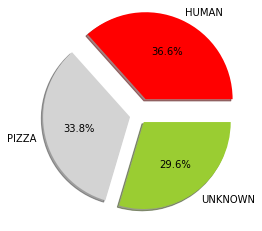

In [82]:
x = list(data_italy['Pizza vs Human'].value_counts())
labels = pd.unique(data_italy['Pizza vs Human'])
#print(labels)
colors = [ 'red' , 'lightgray', 'yellowgreen']  #La bandera de italia en honor a nuestra hipotesis. Aunq metemos gris claro en vez de blanco 
PizzaGrafico = plot.pie(x, labels=labels,colors=colors, shadow=True, explode=(0.2,0.1,0.1),
        autopct='%1.1f%%')
plot.show(PizzaGrafico)

# Hipótesis 2.
## ¿Cual es el plato preferido de los tiburones en el Sur de Europa?

### Para ello vamos a coger los paises  (Portugal, Italia, España y  Grecia)
#### Creamos una tabla para cada uno de los paises para poder visualizar mejor los datos. 

In [83]:
italia = data_clean[(data_clean["Country"]== "ITALY")]
data_italy = italia[["Country", "Type", "Injury", "Fatal"]]
spain = data_clean[(data_clean["Country"]== "SPAIN")]
data_spain = spain[["Country", "Type", "Injury", "Fatal"]]
portugal = data_clean[(data_clean["Country"]== "PORTUGAL")]
data_portugal = portugal[["Country", "Type", "Injury", "Fatal"]]
grecia = data_clean[(data_clean["Country"]== "GREECE")]
data_greece = grecia[["Country", "Type", "Injury", "Fatal"]]
data_sur = pd.concat([data_italy , data_spain , data_portugal, data_greece])

In [84]:
display(data_sur.head())

,Country,Type,Injury,Fatal
437,ITALY,Unknown,"FATAL, but shark involvement prior to death un...",Unknown
786,ITALY,Provoked,Lower left leg injured PROVOKED ACCIDENT,Unknown
1443,ITALY,Unprovoked,FATAL,True
1928,ITALY,Unknown,No Injury to occupants,False
2098,ITALY,Unknown,No Injury to occupants,False


In [85]:
data_sur['Injury2'] = data_sur['Injury'].apply(op.menu)        

In [86]:
display(data_sur)

,Country,Type,Injury,Fatal,Injury2
437,ITALY,Unknown,"FATAL, but shark involvement prior to death un...",Unknown,FATAL
786,ITALY,Provoked,Lower left leg injured PROVOKED ACCIDENT,Unknown,LEGS
1443,ITALY,Unprovoked,FATAL,True,FATAL
1928,ITALY,Unknown,No Injury to occupants,False,NO INJURY
2098,ITALY,Unknown,No Injury to occupants,False,NO INJURY
...,...,...,...,...,...
6179,GREECE,Unprovoked,Herodotus tells of sharks attacking men in the...,True,Unknown
6193,GREECE,Unprovoked,FATAL,True,FATAL
6211,GREECE,Unprovoked,FATAL,True,FATAL
6231,GREECE,Unprovoked,FATAL,True,FATAL


In [87]:
data_sur['Injury2'].value_counts()

Unknown      47
FATAL        38
NO INJURY    31
LEGS         16
ARMS         10
RIBS          1
Name: Injury2, dtype: int64

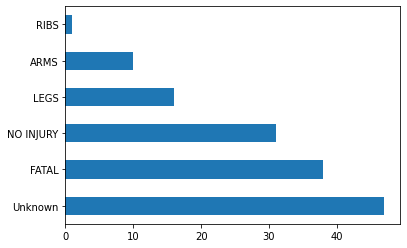

In [88]:
#Diagrama de barras. 
data_sur['Injury2'].value_counts().plot(kind = 'barh');

### Para refrendar la hipótesis podemos asegurar que en el sur de europa, en caso de no morir o de no resultar herido, la mayoria de los afectados han sido mordidos en una o ambas piernas. 
#### Siempre tendiendo en cuenta que tenemos un alto porcentaje de Unknown que podría llegar a cambiar los resultados. 